In [5]:
#Concept 37 - Types of models
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [13]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X,y)
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [22]:
#Concept 41
#Joining the tables
import pandas as pd

#Create first dataframe
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [23]:
#Create second dataframe
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [24]:
#Create third dataframe
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])
df_n

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [26]:
#Append the rows - Join the dataframes vertically
df_new = pd.concat([df_a, df_b])
df_new


,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [27]:
#Concept 42 - Join tables by columns
pd.merge(df_new, df_n, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [30]:
#Concept 44 - Pivoting
import pandas as pd
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'TestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'TestScore'])
df

,regiment,company,TestScore
0,Nighthawks,1st,4
1,Nighthawks,1st,24
2,Nighthawks,2nd,31
3,Nighthawks,2nd,2
4,Dragoons,1st,3
5,Dragoons,1st,4
6,Dragoons,2nd,24
7,Dragoons,2nd,31
8,Scouts,1st,2
9,Scouts,1st,3


In [31]:
#First version of pivot table
pd.pivot_table(df, values="TestScore", index=["company"], columns="regiment", fill_value=0)

regiment,Dragoons,Nighthawks,Scouts
company,,,
1st,3.5,14.0,2.5
2nd,27.5,16.5,2.5


In [33]:
#Second version of pivot table
pd.pivot_table(df, values="TestScore", index=["company"], columns="regiment", aggfunc = "mean",fill_value=0)

regiment,Dragoons,Nighthawks,Scouts
company,,,
1st,3.5,14.0,2.5
2nd,27.5,16.5,2.5


In [120]:
#Concept 45 reverse pivot/ repivot
import pandas as pd
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [121]:
#Concept 45 reverse pivot/ repivot
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [142]:
#Concept 46 - Creation of new variables
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'}, 
                   'B': {0: 1, 1: 3, 2: 5}, 
                   'C': {0: 2, 1: 4, 2: 6}})
df['D'] = df['B'] + df['C']
df

,A,B,C,D
0,a,1,2,3
1,b,3,4,7
2,c,5,6,11


In [148]:
#Concept 47 - CHange data types
ser = pd.Series([1, 2], dtype='int32')
ser
ser.astype('category')
ser.astype('category', ordered=True, categories=[2, 1])

0    1
1    2
dtype: category
Categories (2, int64): [2 < 1]

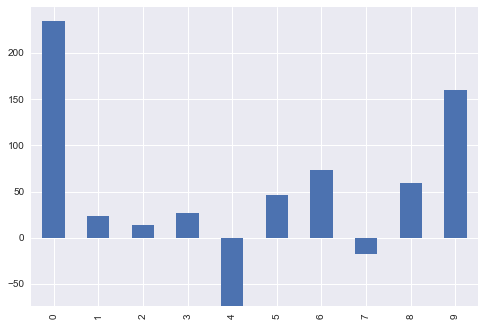

In [158]:
#Concept 48 - Normalization
data = {'score': [234,24,14,27,-74,46,73,-18,59,160]}
df = pd.DataFrame(data)
# View the unnormalized data
df['score'].plot(kind='bar')
plt.show()

C:\Users\abiba\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\abiba\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


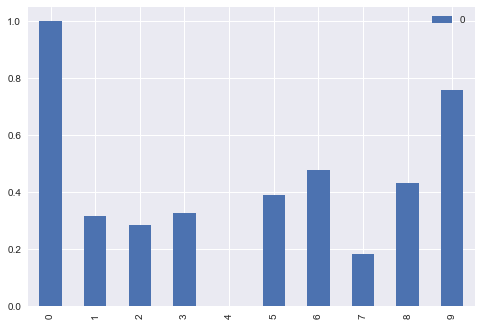

In [161]:
from sklearn import preprocessing
# Create x, where x the 'scores' column's values as floats
x = df['score'].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
# Plot the dataframe
df_normalized.plot(kind='bar')
plt.show()

In [185]:
#Concept 49 - Standardization
mu, sigma = 10, 5 # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)
df = pd.DataFrame(data)
avg = df.mean()
sd = df.std()

df1 = (df-avg)/sd
df1


,0
0,-1.865389
1,0.864999
2,-0.891887
3,-0.649913
4,0.769422
5,-1.099934
6,-0.680802
7,1.054565
8,0.687888
9,-0.373351


In [193]:
#Concept 50 - Sampling
raw_data = {
        'serial_no1':['1','2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'weight': [51, 15, 15, 61, 16, 14, 15, 10, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['serial_no1','weight'])
df_s = df_n.sample(5)
df_s_r = df_n.sample(15, replace = True)

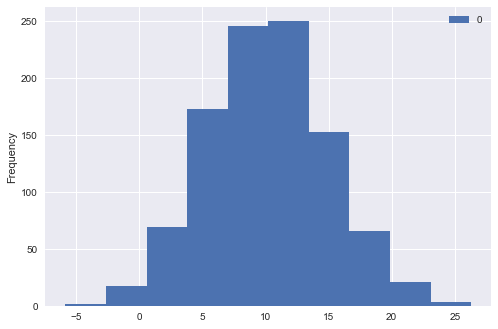

In [191]:
#Concept 51 - Checking sampling distributions
df.plot(kind = 'hist')
plt.show()

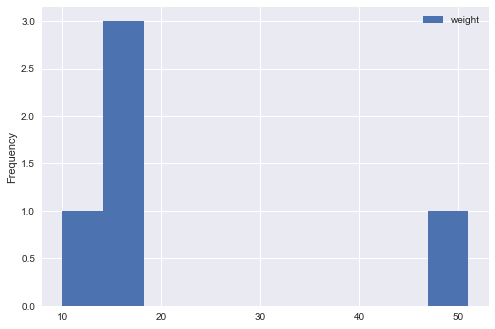

In [190]:
df_s.plot(kind = 'hist')
plt.show()

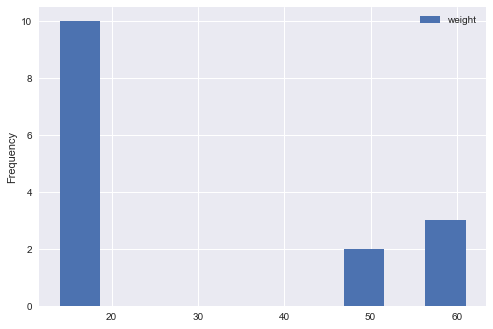

In [194]:
df_s_r.plot(kind='hist')
plt.show()

In [124]:
#Concept 52 - training/testing samples
train, test = np.split(df_n.sample(frac=1), [int(.7*len(df_n))])

In [125]:
train

,serial_no1,weight
4,5,16
7,9,10
0,1,51
8,10,61
1,2,15
3,4,61
2,3,15


In [127]:
train, validate, test = np.split(dfIris.sample(frac=1), [int(.6*len(dfIris)), int(.8*len(dfIris))])

In [128]:
train

,sepal_len,sepal_wid,petal_len,petal_wid,class,slRsw,plRpw,pwBin
72,6.3,2.5,4.9,1.5,Iris-versicolor,2.520000,3.266667,0.7-1.5
29,4.7,3.2,1.6,0.2,Iris-setosa,1.468750,8.000000,<=0.7
139,6.9,3.1,5.4,2.1,Iris-virginica,2.225806,2.571429,>1.5
23,5.1,3.3,1.7,0.5,Iris-setosa,1.545455,3.400000,<=0.7
88,5.6,3.0,4.1,1.3,Iris-versicolor,1.866667,3.153846,0.7-1.5
35,5.0,3.2,1.2,0.2,Iris-setosa,1.562500,6.000000,<=0.7
148,6.2,3.4,5.4,2.3,Iris-virginica,1.823529,2.347826,>1.5
77,6.7,3.0,5.0,1.7,Iris-versicolor,2.233333,2.941176,>1.5
58,6.6,2.9,4.6,1.3,Iris-versicolor,2.275862,3.538462,0.7-1.5
95,5.7,3.0,4.2,1.2,Iris-versicolor,1.900000,3.500000,0.7-1.5


In [129]:
test

,sepal_len,sepal_wid,petal_len,petal_wid,class,slRsw,plRpw,pwBin
109,7.2,3.6,6.1,2.5,Iris-virginica,2.000000,2.440000,>1.5
98,5.1,2.5,3.0,1.1,Iris-versicolor,2.040000,2.727273,0.7-1.5
118,7.7,2.6,6.9,2.3,Iris-virginica,2.961538,3.000000,>1.5
38,4.4,3.0,1.3,0.2,Iris-setosa,1.466667,6.500000,<=0.7
67,5.8,2.7,4.1,1.0,Iris-versicolor,2.148148,4.100000,0.7-1.5
145,6.7,3.0,5.2,2.3,Iris-virginica,2.233333,2.260870,>1.5
19,5.1,3.8,1.5,0.3,Iris-setosa,1.342105,5.000000,<=0.7
126,6.2,2.8,4.8,1.8,Iris-virginica,2.214286,2.666667,>1.5
104,6.5,3.0,5.8,2.2,Iris-virginica,2.166667,2.636364,>1.5
141,6.9,3.1,5.1,2.3,Iris-virginica,2.225806,2.217391,>1.5


In [130]:
validate

,sepal_len,sepal_wid,petal_len,petal_wid,class,slRsw,plRpw,pwBin
18,5.7,3.8,1.7,0.3,Iris-setosa,1.500000,5.666667,<=0.7
25,5.0,3.0,1.6,0.2,Iris-setosa,1.666667,8.000000,<=0.7
53,5.5,2.3,4.0,1.3,Iris-versicolor,2.391304,3.076923,0.7-1.5
70,5.9,3.2,4.8,1.8,Iris-versicolor,1.843750,2.666667,>1.5
125,7.2,3.2,6.0,1.8,Iris-virginica,2.250000,3.333333,>1.5
37,4.9,3.1,1.5,0.1,Iris-setosa,1.580645,15.000000,<=0.7
60,5.0,2.0,3.5,1.0,Iris-versicolor,2.500000,3.500000,0.7-1.5
16,5.4,3.9,1.3,0.4,Iris-setosa,1.384615,3.250000,<=0.7
115,6.4,3.2,5.3,2.3,Iris-virginica,2.000000,2.304348,>1.5
142,5.8,2.7,5.1,1.9,Iris-virginica,2.148148,2.684211,>1.5


In [197]:
#Cocnept 53 - down sampling
raw_data = {
        'class': ['p', 'f', 'f', 'p', 'f', 'f', 'f', 'f', 'p', 'f'],
        'score': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['class','score'])
pd.pivot_table(df_n, values="score", index=["class"],aggfunc = 'count', fill_value=0)


class
f    7
p    3
Name: score, dtype: int64

In [209]:
#Cocnept 53 - down sampling
tp = df_n[df_n['class'] == 'p']
tn = df_n[df_n['class']=='f'].sample(len(tp))
df_ds = pd.concat([tp,tn])
df_ds

,class,score
0,p,51
3,p,61
8,p,61
4,f,16
6,f,15
5,f,14


In [210]:
#Cocnept 54 - up sampling
tn = df_n[df_n['class']=='f']
tp = df_n[df_n['class'] == 'p'].sample(len(tn), replace = True)
df_us = pd.concat([tp,tn])
df_us

,class,score
0,p,51
3,p,61
0,p,51
0,p,51
8,p,61
8,p,61
8,p,61
1,f,15
2,f,15
4,f,16


In [212]:
#Concept 55 - Equal width binning
bins = [0, 25, 50, 75,100]
raw_data = {
        'class': ['p', 'f', 'f', 'p', 'f', 'f', 'f', 'f', 'p', 'f'],
        'score': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df = pd.DataFrame(raw_data, columns = ['class','score'])
df['binned'] = pd.cut(df['score'], bins)
df

,class,score,binned
0,p,51,"(50, 75]"
1,f,15,"(0, 25]"
2,f,15,"(0, 25]"
3,p,61,"(50, 75]"
4,f,16,"(0, 25]"
5,f,14,"(0, 25]"
6,f,15,"(0, 25]"
7,f,1,"(0, 25]"
8,p,61,"(50, 75]"
9,f,16,"(0, 25]"


In [224]:
#Concept 56 - Equal frequency binning
quants = [0.05, 0.25, 0.5, 0.75, 0.95]
q = df['score'].quantile(quants)
r = q.rank()
r

0.05    1.0
0.25    2.0
0.50    3.0
0.75    4.0
0.95    5.0
Name: score, dtype: float64

In [216]:
#Basic project 1 - Exploring Iris data
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
irisData = pd.read_csv("E:\\Training\\REVA 2017\\Projects\\Iris2.csv")
dfIris = pd.DataFrame(irisData)


In [17]:
#Explore head and tail
dfIris.head()


,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
#Explore head and tail
dfIris.tail()


,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [20]:
#Check the dimensions of the data
dfIris.shape

(150, 5)

In [21]:
dfIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_len    150 non-null float64
sepal_wid    150 non-null float64
petal_len    150 non-null float64
petal_wid    150 non-null float64
class        150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [22]:
#Explore range and shape
dfIris.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


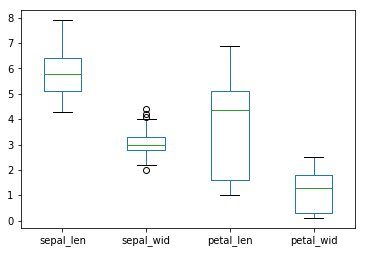

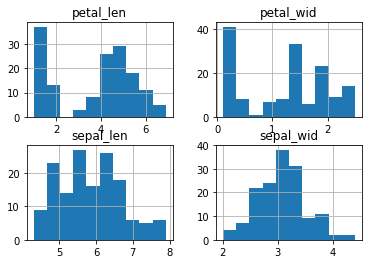

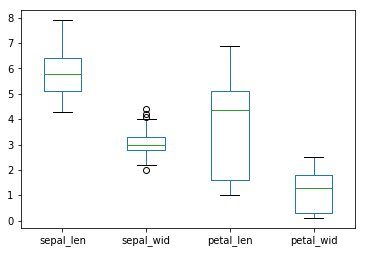

In [27]:
#Outlier analysis
import pandas as pd # conventional alias
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
dfIris.plot.box()
plt.show()

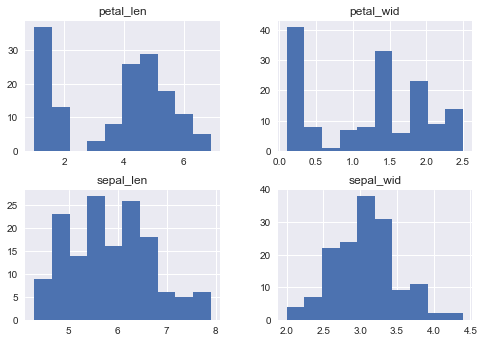

In [36]:
#Histogram
dfIris.hist()
plt.show()

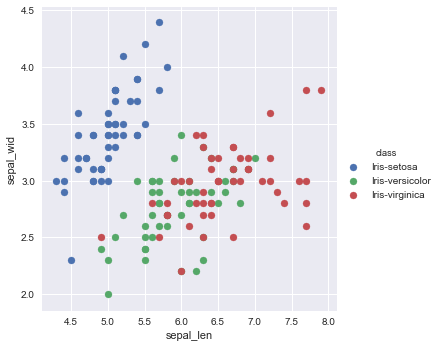

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)
sns.FacetGrid(dfIris, hue="class", size=5) \
   .map(plt.scatter, "sepal_len", "sepal_wid") \
   .add_legend()
plt.show()

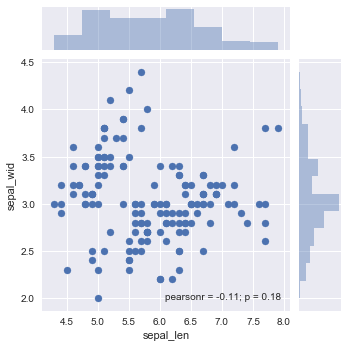

In [39]:
sns.jointplot(x="sepal_len", y="sepal_wid", data=dfIris, size=5)
plt.show()

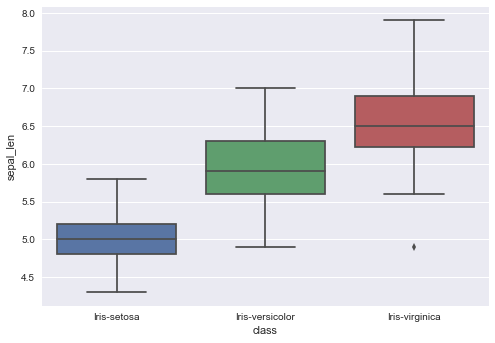

In [40]:
sns.boxplot(x="class", y="sepal_len", data=dfIris)
plt.show()

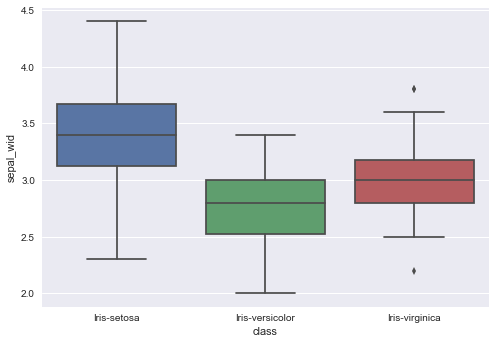

In [41]:
sns.boxplot(x="class", y="sepal_wid", data=dfIris)
plt.show()

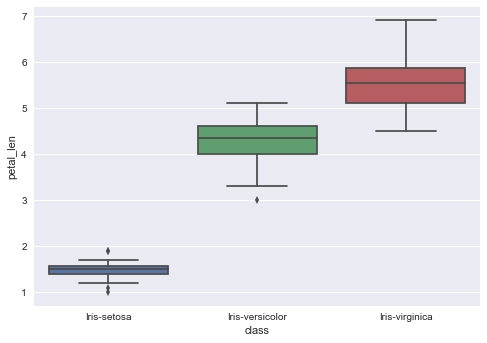

In [42]:
sns.boxplot(x="class", y="petal_len", data=dfIris)
plt.show()

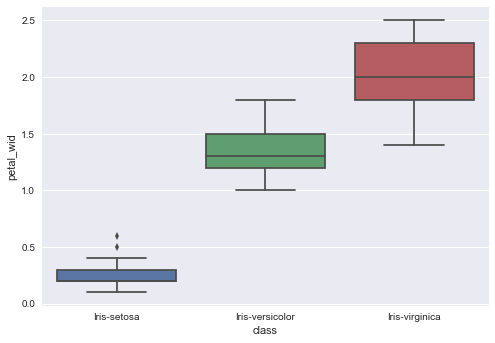

In [43]:
sns.boxplot(x="class", y="petal_wid", data=dfIris)
plt.show()

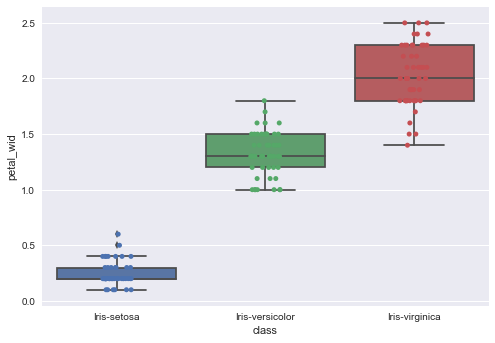

In [47]:
sns.boxplot(x="class", y="petal_wid", data=dfIris)
sns.stripplot(x="class", y="petal_wid", jitter = True, data=dfIris)
plt.show()

C:\Users\abiba\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


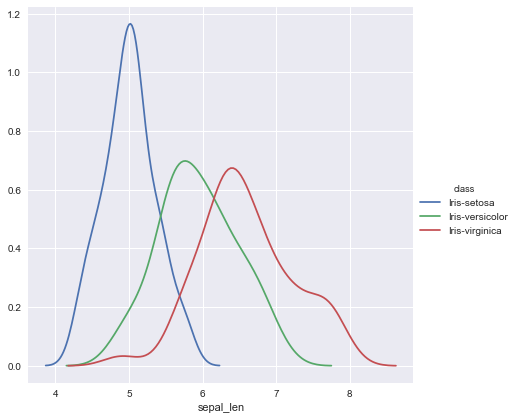

In [49]:
sns.FacetGrid(dfIris, hue="class", size=6) \
   .map(sns.kdeplot, "sepal_len") \
   .add_legend()
plt.show()

C:\Users\abiba\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


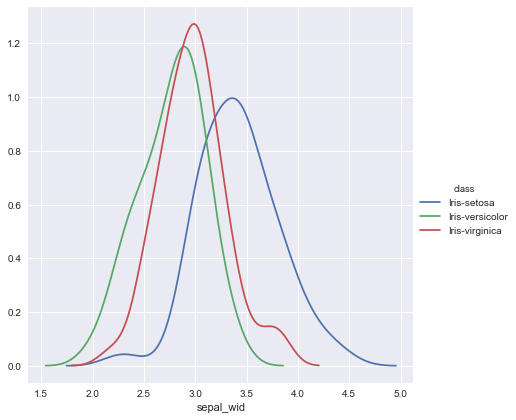

In [52]:
sns.FacetGrid(dfIris, hue="class", size=6) \
   .map(sns.kdeplot, "sepal_wid") \
   .add_legend()
plt.show()

C:\Users\abiba\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


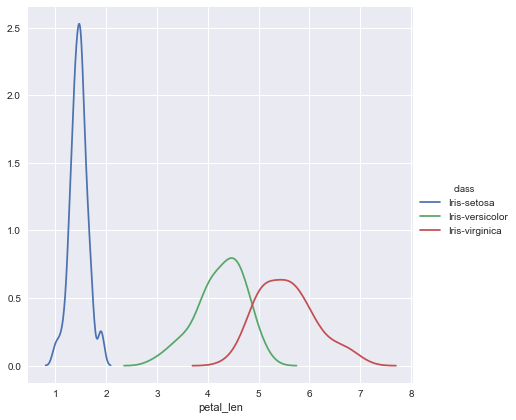

In [53]:
sns.FacetGrid(dfIris, hue="class", size=6) \
   .map(sns.kdeplot, "petal_len") \
   .add_legend()
plt.show()

C:\Users\abiba\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


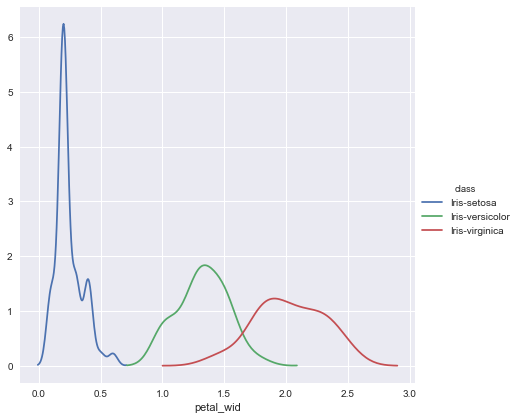

In [54]:
sns.FacetGrid(dfIris, hue="class", size=6) \
   .map(sns.kdeplot, "petal_wid") \
   .add_legend()
plt.show()

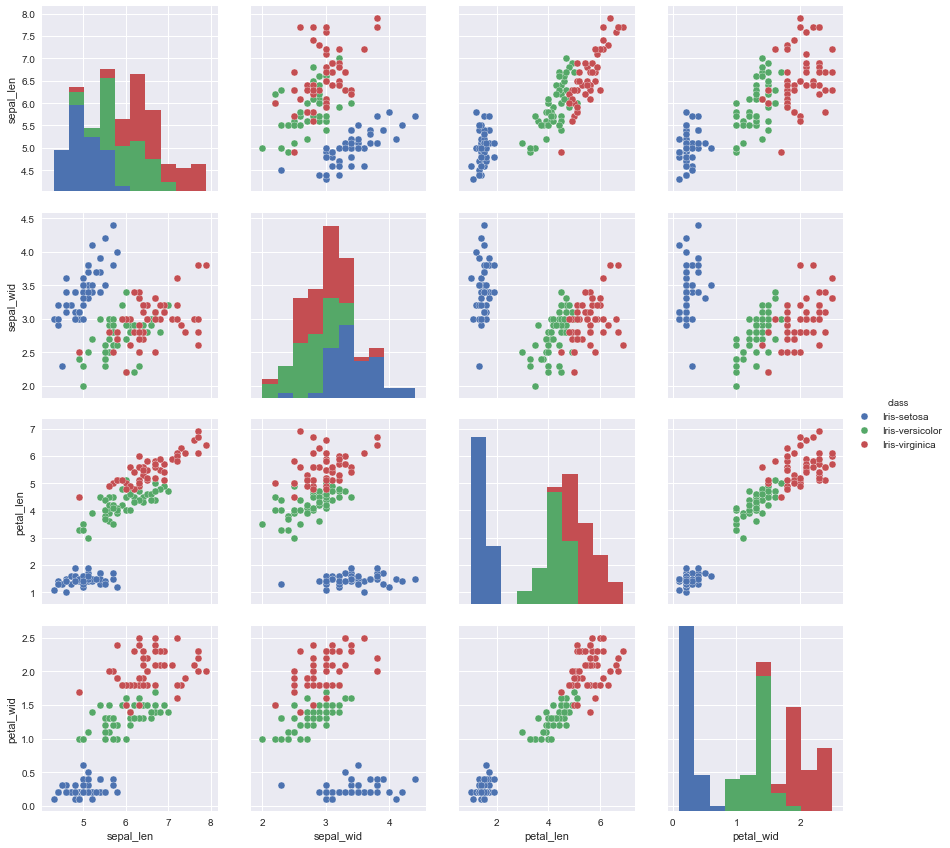

In [56]:
sns.pairplot(dfIris, hue="class", size=3)
plt.show()

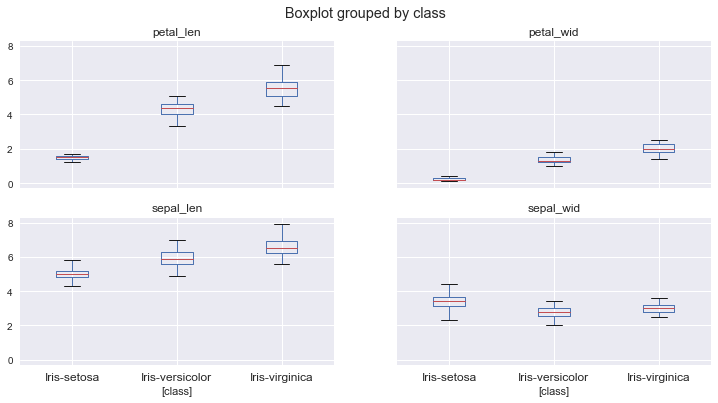

In [59]:
dfIris.boxplot(by="class", figsize=(12, 6))
plt.show()

In [62]:
#Create new variables
dfIris['slRsw'] = dfIris['sepal_len']/dfIris['sepal_wid']
dfIris['plRpw'] = dfIris['petal_len']/dfIris['petal_wid']

In [63]:
dfIris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class,slRsw,plRpw
0,5.1,3.5,1.4,0.2,Iris-setosa,1.457143,7.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.633333,7.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.468750,6.5
3,4.6,3.1,1.5,0.2,Iris-setosa,1.483871,7.5
4,5.0,3.6,1.4,0.2,Iris-setosa,1.388889,7.0


In [71]:
#Bin variables
import numpy as np
dfIris['pwBin'] = np.where(dfIris['petal_wid'] <=0.7,'<=0.7', (np.where(dfIris['petal_wid']> 1.5 ,'>1.5', '0.7-1.5')))

In [72]:
dfIris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class,slRsw,plRpw,pwBin
0,5.1,3.5,1.4,0.2,Iris-setosa,1.457143,7.0,<=0.7
1,4.9,3.0,1.4,0.2,Iris-setosa,1.633333,7.0,<=0.7
2,4.7,3.2,1.3,0.2,Iris-setosa,1.468750,6.5,<=0.7
3,4.6,3.1,1.5,0.2,Iris-setosa,1.483871,7.5,<=0.7
4,5.0,3.6,1.4,0.2,Iris-setosa,1.388889,7.0,<=0.7


In [75]:
pd.pivot_table(dfIris, values="petal_wid", index=["pwBin"], columns="class", aggfunc = "count",fill_value=0)

class,Iris-setosa,Iris-versicolor,Iris-virginica
pwBin,,,
0.7-1.5,0,45,3
<=0.7,50,0,0
>1.5,0,5,47


In [78]:
train, test = np.split(dfIris.sample(frac=1), [int(.7*len(dfIris))])

In [79]:
train

,sepal_len,sepal_wid,petal_len,petal_wid,class,slRsw,plRpw,pwBin
149,5.9,3.0,5.1,1.8,Iris-virginica,1.966667,2.833333,>1.5
76,6.8,2.8,4.8,1.4,Iris-versicolor,2.428571,3.428571,0.7-1.5
75,6.6,3.0,4.4,1.4,Iris-versicolor,2.200000,3.142857,0.7-1.5
3,4.6,3.1,1.5,0.2,Iris-setosa,1.483871,7.500000,<=0.7
44,5.1,3.8,1.9,0.4,Iris-setosa,1.342105,4.750000,<=0.7
129,7.2,3.0,5.8,1.6,Iris-virginica,2.400000,3.625000,>1.5
12,4.8,3.0,1.4,0.1,Iris-setosa,1.600000,14.000000,<=0.7
87,6.3,2.3,4.4,1.3,Iris-versicolor,2.739130,3.384615,0.7-1.5
8,4.4,2.9,1.4,0.2,Iris-setosa,1.517241,7.000000,<=0.7
78,6.0,2.9,4.5,1.5,Iris-versicolor,2.068966,3.000000,0.7-1.5


In [80]:
train, validate, test = np.split(dfIris.sample(frac=1), [int(.6*len(dfIris)), int(.8*len(dfIris))])

In [81]:
train

,sepal_len,sepal_wid,petal_len,petal_wid,class,slRsw,plRpw,pwBin
97,6.2,2.9,4.3,1.3,Iris-versicolor,2.137931,3.307692,0.7-1.5
147,6.5,3.0,5.2,2.0,Iris-virginica,2.166667,2.600000,>1.5
96,5.7,2.9,4.2,1.3,Iris-versicolor,1.965517,3.230769,0.7-1.5
42,4.4,3.2,1.3,0.2,Iris-setosa,1.375000,6.500000,<=0.7
38,4.4,3.0,1.3,0.2,Iris-setosa,1.466667,6.500000,<=0.7
142,5.8,2.7,5.1,1.9,Iris-virginica,2.148148,2.684211,>1.5
28,5.2,3.4,1.4,0.2,Iris-setosa,1.529412,7.000000,<=0.7
111,6.4,2.7,5.3,1.9,Iris-virginica,2.370370,2.789474,>1.5
40,5.0,3.5,1.3,0.3,Iris-setosa,1.428571,4.333333,<=0.7
36,5.5,3.5,1.3,0.2,Iris-setosa,1.571429,6.500000,<=0.7


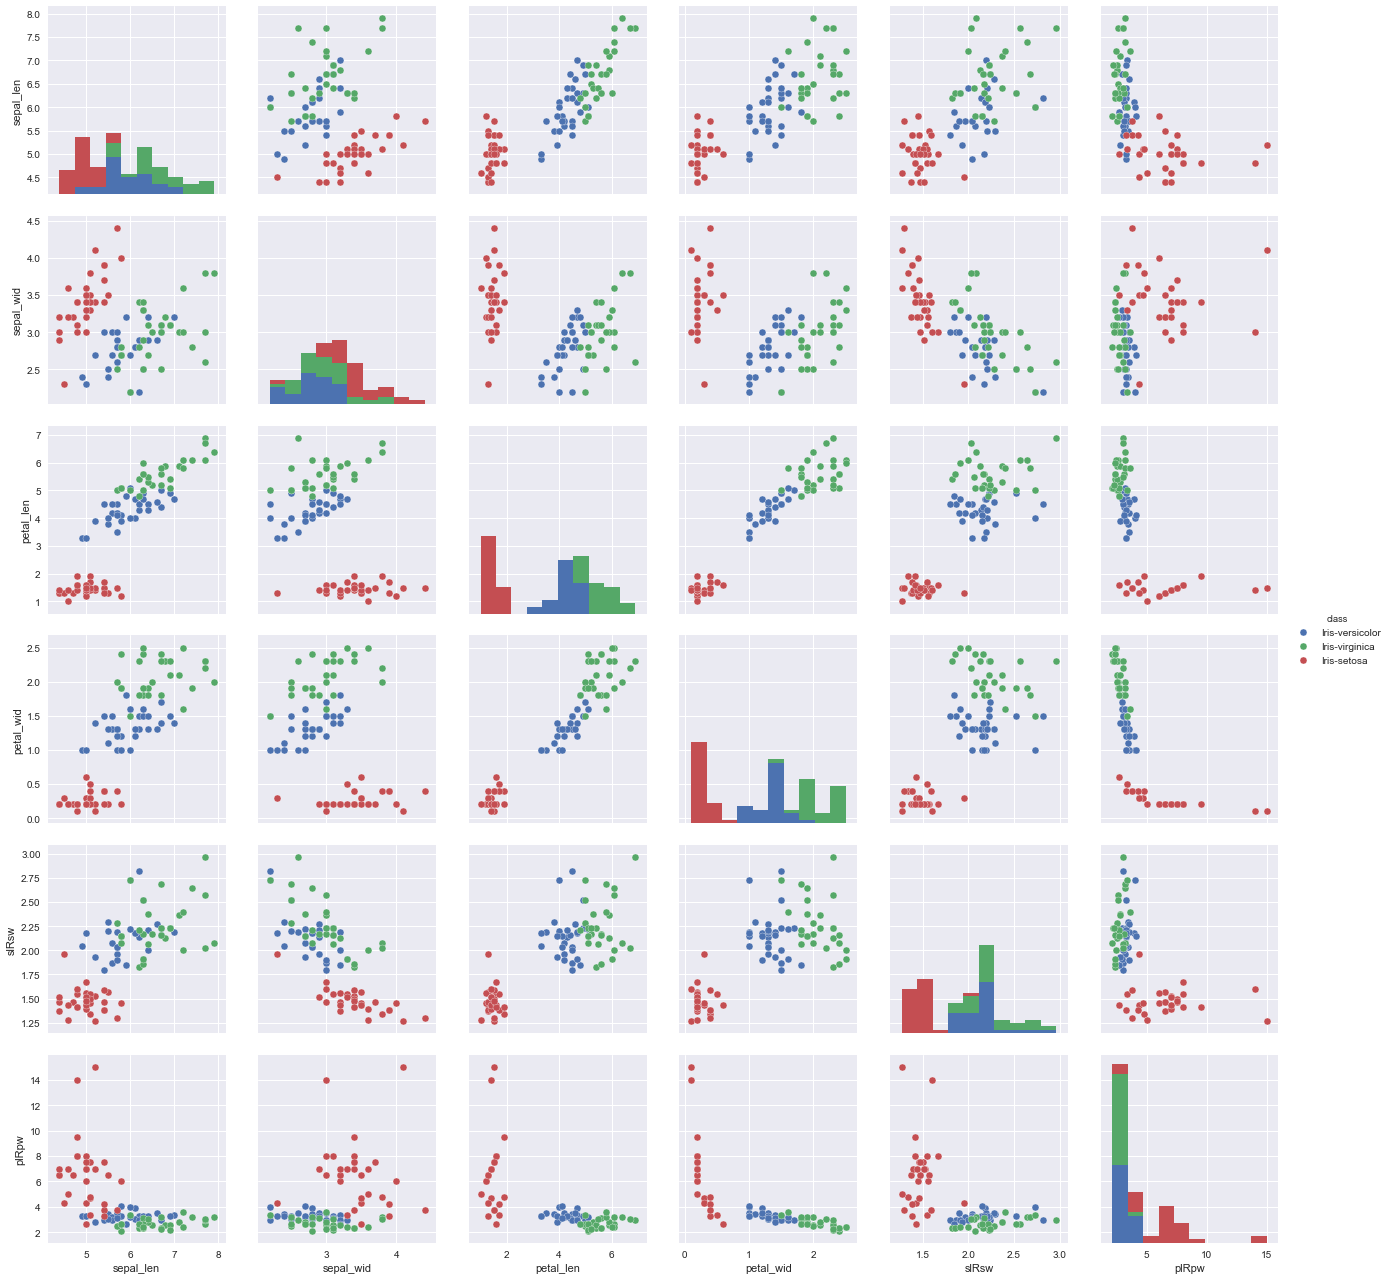

In [82]:
sns.pairplot(train, hue="class", size=3)
plt.show()

In [83]:
pd.pivot_table(train, values="petal_wid", index=["pwBin"], columns="class", aggfunc = "count",fill_value=0)

class,Iris-setosa,Iris-versicolor,Iris-virginica
pwBin,,,
0.7-1.5,0,27,1
<=0.7,31,0,0
>1.5,0,4,27


In [85]:
pd.pivot_table(test, values="petal_wid", index=["pwBin"], columns="class", aggfunc = "count",fill_value=0)

class,Iris-setosa,Iris-versicolor,Iris-virginica
pwBin,,,
0.7-1.5,0,6,0
<=0.7,12,0,0
>1.5,0,1,11


In [87]:
#Project 2
import pandas as pd
churnData = pd.read_csv("E:\\Training\\REVA 2017\\Projects\\churn.csv")
df = pd.DataFrame(churnData)
df.head()

,CUSTOMERID,STATE,CHURN_REASON,CHURN_STATUS,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,NO_SERVICES,RATE_PLAN
0,349224,FL,ACTIVATION,Active,1365.94,1183.71,10,3,UNLIMITED
1,253440,FL,ACTIVATION,Active,7617.94,7617.94,13,3,OTHER
2,186282,GA,BILLING NONPAY,Churn,2874.47,2874.47,13,3,300 MINUTE
3,226167,GA,ACTIVATION,Active,658.80,658.80,14,3,100 MINUTE
4,286110,AL,ACTIVATION,Active,587.45,526.46,12,3,UNLIMITED


In [89]:
#Group by
#data.groupby(['col1', 'col2'])['col3'].mean()
import pandas as pd
churnData = pd.read_csv("E:\\Training\\REVA 2017\\Projects\\churn.csv")
df = pd.DataFrame(churnData)
df.groupby(['STATE'])['CHURN_STATUS'].count()

STATE
AK        3
AL    22815
AR      319
AZ       25
CA       83
CO       34
CT       12
DC        5
DE        2
FL    12156
GA    30080
Name: CHURN_STATUS, dtype: int64

In [91]:
pd.pivot_table(df, values="RATE_PLAN", index=["STATE"], columns="CHURN_STATUS", aggfunc = "count",fill_value=0)

CHURN_STATUS,Active,Churn
STATE,,
AK,0,3
AL,12592,10223
AR,109,210
AZ,0,25
CA,13,70
CO,2,32
CT,2,10
DC,1,4
DE,0,2


In [92]:
df.describe()

,CUSTOMERID,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,NO_SERVICES
count,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000
mean,207132.709235,907.141302,871.373408,12.253395,3.426359
std,107951.022669,932.175201,897.686330,6.542304,1.937033
min,10002.000000,0.000000,0.000000,1.000000,0.000000
25%,118132.500000,360.995000,348.495000,8.000000,2.000000
50%,205003.500000,636.150000,610.225000,11.000000,5.000000
75%,296900.250000,1130.727500,1080.477500,17.000000,5.000000
max,399441.000000,18063.530000,17380.210000,33.000000,10.000000


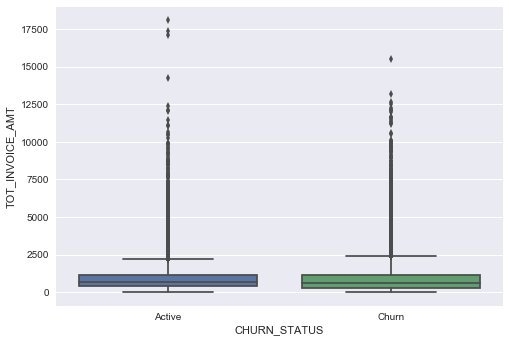

In [93]:
sns.boxplot(x="CHURN_STATUS", y="TOT_INVOICE_AMT", data=df)
plt.show()

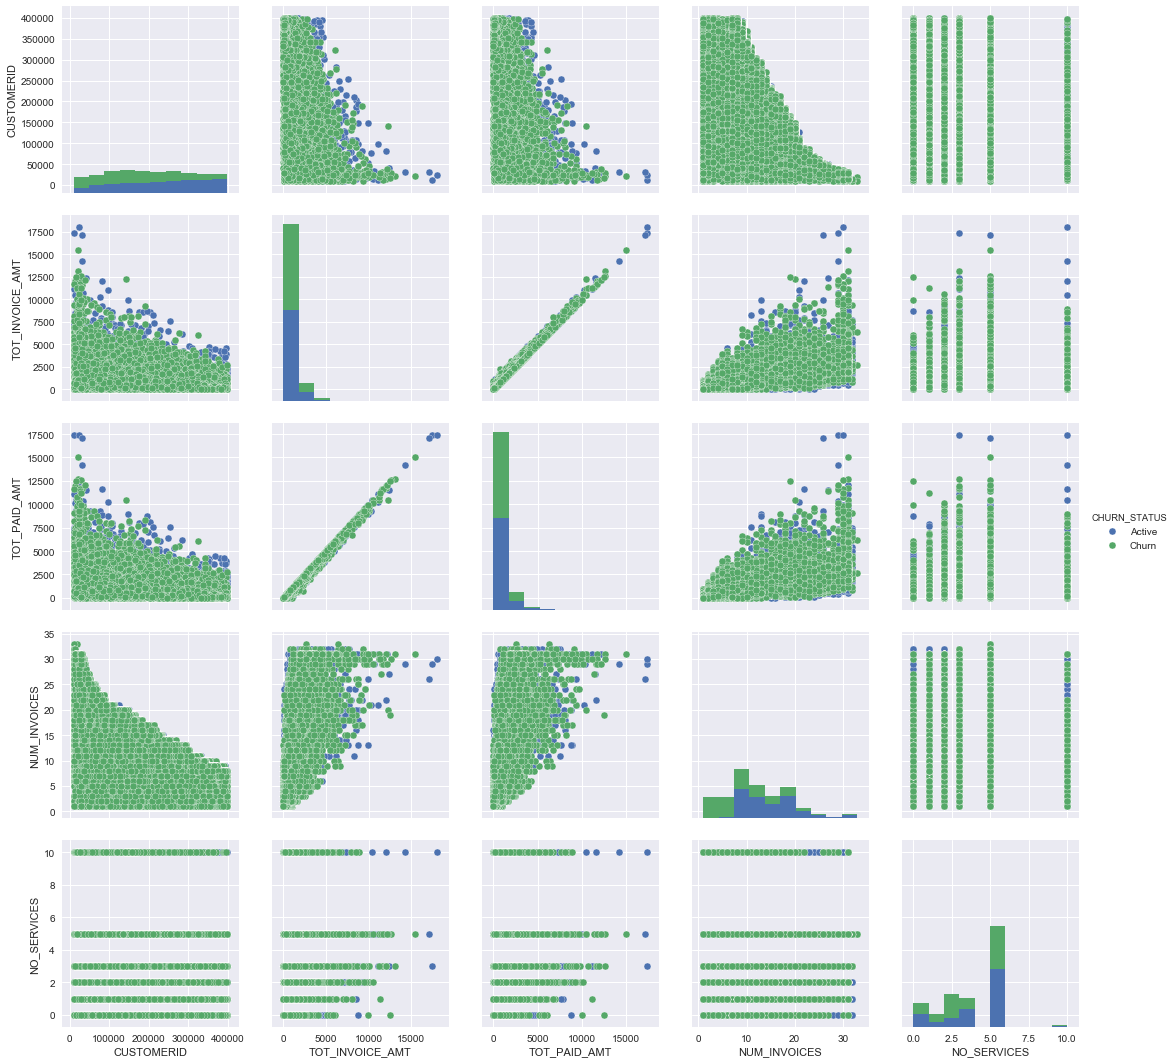

In [94]:
sns.pairplot(df, hue="CHURN_STATUS", size=3)
plt.show()

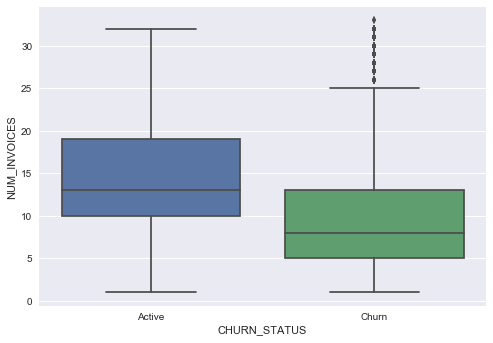

In [95]:
sns.boxplot(x="CHURN_STATUS", y="NUM_INVOICES", data=df)
plt.show()

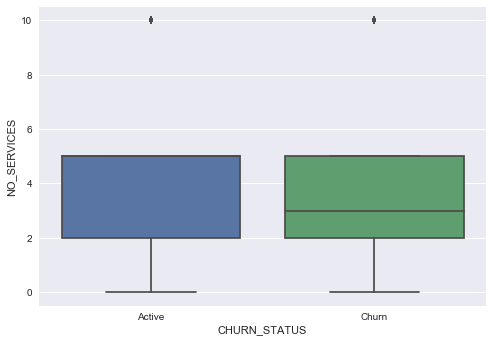

In [97]:
sns.boxplot(x="CHURN_STATUS", y="NO_SERVICES", data=df)
plt.show()

In [98]:
df['numInvBin'] = np.where(df['NUM_INVOICES'] <= 10,'<=10','>10')

In [106]:
pd.pivot_table(df, values="TOT_PAID_AMT", index=["numInvBin"], columns="CHURN_STATUS", aggfunc = "count",fill_value=0)

CHURN_STATUS,Active,Churn
numInvBin,,
<=10,10093,20214
>10,23583,11644


In [102]:
pd.pivot_table(df, values="TOT_PAID_AMT", index=["NUM_INVOICES"], columns="CHURN_STATUS", aggfunc = "count",fill_value=0)

CHURN_STATUS,Active,Churn
NUM_INVOICES,,
1,27,2034
2,38,1647
3,21,1466
4,29,1749
5,40,2239
6,75,2226
7,148,2274
8,3215,2621
9,4077,2354


In [104]:
df['numInvBin2'] = np.where(df['NUM_INVOICES'] <= 7,'<=7','>7')

In [105]:
pd.pivot_table(df, values="TOT_PAID_AMT", index=["numInvBin2"], columns="CHURN_STATUS", aggfunc = "count",fill_value=0)

CHURN_STATUS,Active,Churn
numInvBin2,,
<=7,378,13635
>7,33298,18223


In [107]:
train, test = np.split(df.sample(frac=1), [int(.7*len(df))])

In [108]:
pd.pivot_table(train, values="TOT_PAID_AMT", index=["numInvBin2"], columns="CHURN_STATUS", aggfunc = "count",fill_value=0)

CHURN_STATUS,Active,Churn
numInvBin2,,
<=7,251,9544
>7,23250,12828


In [109]:
pd.pivot_table(test, values="TOT_PAID_AMT", index=["numInvBin2"], columns="CHURN_STATUS", aggfunc = "count",fill_value=0)

CHURN_STATUS,Active,Churn
numInvBin2,,
<=7,127,4091
>7,10048,5395
